In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

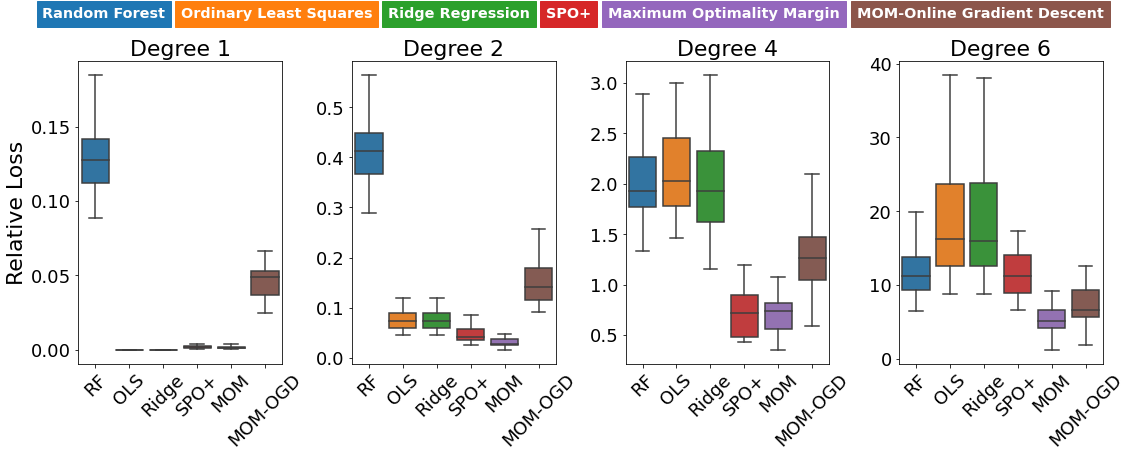

In [32]:
# First Experiment
# Loss versus Degree
degree_set = [1, 2, 4, 6]
fig, axs = plt.subplots(1, 4)
fig.set_figwidth(16)
fig.set_figheight(6)
for i in range(len(degree_set)):
    globals()[f"Data_deg{degree_set[i]}"] = np.loadtxt(os.path.join('Degree', f"Loss_degree{degree_set[i]}"))
    columns = ["RF", "OLS", "Ridge", "MOM", "SPO+", "MOM-OGD"]
    globals()[f"Data_deg{degree_set[i]}"] = pd.DataFrame(globals()[f"Data_deg{degree_set[i]}"], columns = columns)
    columns = ["RF", "OLS", "Ridge", "SPO+", "MOM", "MOM-OGD"]
    globals()[f"Data_deg{degree_set[i]}"] = globals()[f"Data_deg{degree_set[i]}"].reindex(columns = columns)
    sns.boxplot(data = globals()[f"Data_deg{degree_set[i]}"], showfliers = False, ax=axs[i])
    axs[i].set_title(f"Degree {degree_set[i]}", fontsize=22)
    if i == 0:
        axs[i].set_ylabel('Relative Loss', fontsize=22)
    axs[i].tick_params(axis='x', rotation=45, labelsize=18)
    axs[i].tick_params(axis='y', labelsize=18)

x = 0.05
y = 0.025
fig.text(0.0+x, 1.0+y, 'Random Forest',
         backgroundcolor=sns.color_palette()[0], 
         color='white', weight='extra bold', size='x-large')
fig.text(0.12+x, 1.0+y, 'Ordinary Least Squares',
         backgroundcolor=sns.color_palette()[1],
         color='white', weight='extra bold', size='x-large')
fig.text(0.30+x, 1.0+y, 'Ridge Regression',
         backgroundcolor=sns.color_palette()[2],
         color='white', weight='extra bold', size='x-large')
fig.text(0.437+x, 1.0+y, 'SPO+',
         backgroundcolor=sns.color_palette()[3],
         color='white', weight='extra bold', size='x-large')
fig.text(0.491+x, 1.0+y, 'Maximum Optimality Margin',
         backgroundcolor=sns.color_palette()[4],
         color='white', weight='extra bold', size='x-large')
fig.text(0.707+x, 1.0+y, 'MOM-Online Gradient Descent',
         backgroundcolor=sns.color_palette()[5],
         color='white', weight='extra bold', size='x-large')
plt.tight_layout()
plt.savefig("Experiment1-1.eps", bbox_inches='tight')
plt.savefig("Experiment1-1.jpg", bbox_inches='tight')
plt.show()

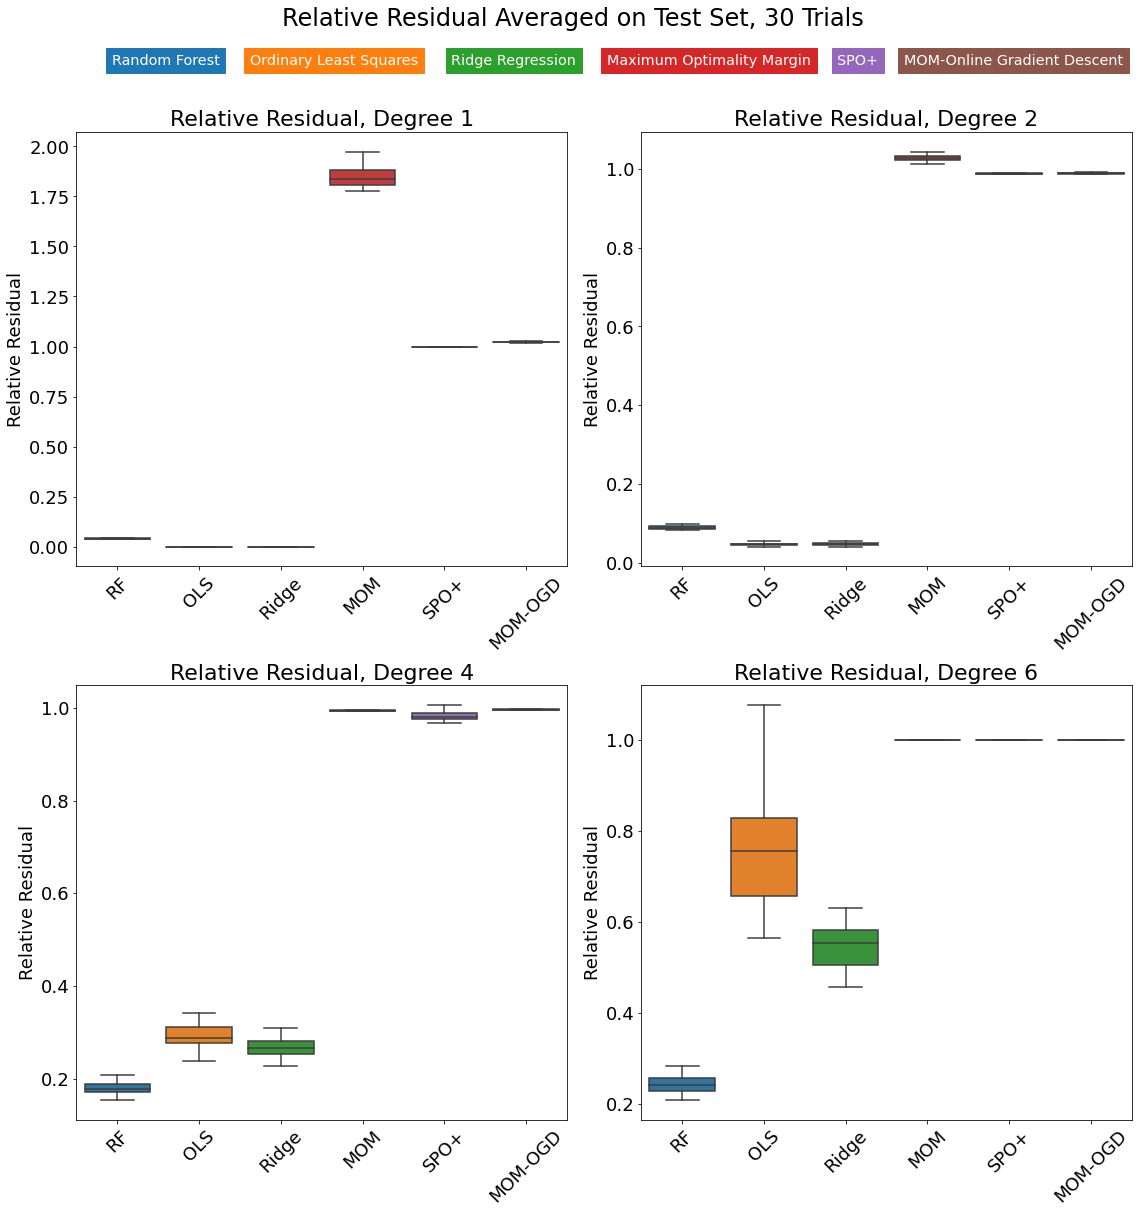

In [12]:
# First Experiment
# Residual versus Degree
degree_set = [1, 2, 4, 6]
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(16)
fig.set_figheight(16)
for i in range(len(degree_set)):
    globals()[f"Data_deg{degree_set[i]}"] = np.loadtxt(os.path.join('Degree', f"Error_degree{degree_set[i]}"))
    columns = ["RF", "OLS", "Ridge", "MOM", "SPO+", "MOM-OGD"]
    globals()[f"Data_deg{degree_set[i]}"] = pd.DataFrame(globals()[f"Data_deg{degree_set[i]}"], columns = columns)
    sns.boxplot(data = globals()[f"Data_deg{degree_set[i]}"], showfliers = False, ax=axs[int(i/2), i%2])
    axs[int(i/2), i%2].set_title(f"Relative Residual, Degree {degree_set[i]}", fontsize=22)
    axs[int(i/2), i%2].set_ylabel('Relative Residual', fontsize=18)
    axs[int(i/2), i%2].tick_params(axis='x', rotation=45, labelsize=18)
    axs[int(i/2), i%2].tick_params(axis='y', labelsize=18)

fig.suptitle("Relative Residual Averaged on Test Set, 30 Trials", fontsize = 24, y=1.05)
x = 0.05
fig.text(0.05+x, 1.0, 'Random Forest',
         backgroundcolor=sns.color_palette()[0], color='white', weight='roman',
         size='x-large')
fig.text(0.17+x, 1.0, 'Ordinary Least Squares',
         backgroundcolor=sns.color_palette()[1],
         color='white', weight='roman', size='x-large')
fig.text(0.345+x, 1.0, 'Ridge Regression',
         backgroundcolor=sns.color_palette()[2],
         color='white', weight='roman', size='x-large')
fig.text(0.48+x, 1.0, 'Maximum Optimality Margin',
         backgroundcolor=sns.color_palette()[3],
         color='white', weight='roman', size='x-large')
fig.text(0.68+x, 1.0, 'SPO+',
         backgroundcolor=sns.color_palette()[4],
         color='white', weight='roman', size='x-large')
fig.text(0.738+x, 1.0, 'MOM-Online Gradient Descent',
         backgroundcolor=sns.color_palette()[5],
         color='white', weight='roman', size='x-large')
plt.tight_layout()
plt.savefig("Experiment1-2.eps", bbox_inches='tight')
plt.savefig("Experiment1-2.jpg", bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


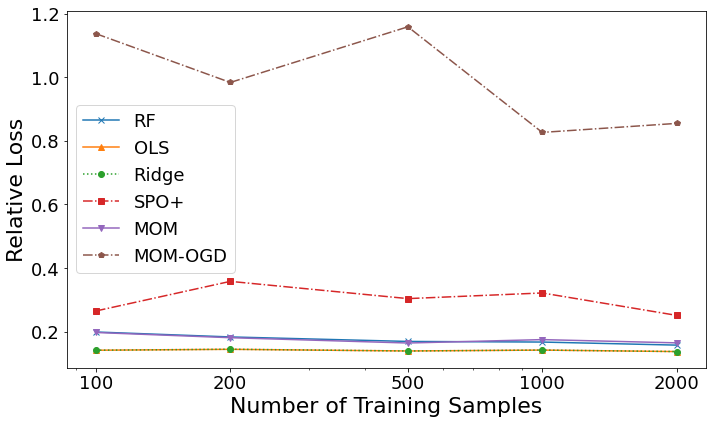

In [46]:
# Third Experiment
N_set = [100, 200, 500, 1000, 2000]
fig, axs = plt.subplots(1, 1)
fig.set_figwidth(10)
fig.set_figheight(6)
Algs = ["RF", "OLS", "Ridge", "SPO+", "MOM", "MOM-OGD"]
for j in range(len(Algs)):
    globals()[f"Loss_{Algs[j]}"] = []
    globals()[f"Res_{Algs[j]}"] = []
# Loss versus N
for i in range(len(N_set)):
    globals()[f"Data_N{N_set[i]}"] = np.loadtxt(os.path.join('Sample_Complexity', f"Loss_N{N_set[i]}"))
    globals()[f"Data_N{N_set[i]}"][:, [3, 4]] = globals()[f"Data_N{N_set[i]}"][:, [4, 3]]
    for j in range(len(Algs)):
        globals()[f"Loss_{Algs[j]}"].append(np.average(globals()[f"Data_N{N_set[i]}"][:, j]))

j=0
axs.plot(N_set, globals()[f"Loss_{Algs[j]}"],
            label=Algs[j], color=sns.color_palette()[j], marker='x', linestyle='-')
j=1
axs.plot(N_set, globals()[f"Loss_{Algs[j]}"],
            label=Algs[j], color=sns.color_palette()[j], marker='^', linestyle='-')
j=2
axs.plot(N_set, globals()[f"Loss_{Algs[j]}"],
            label=Algs[j], color=sns.color_palette()[j], marker='o', linestyle=':')
j=3
axs.plot(N_set, globals()[f"Loss_{Algs[j]}"],
            label=Algs[j], color=sns.color_palette()[j], marker='s', linestyle='-.')
j=4
axs.plot(N_set, globals()[f"Loss_{Algs[j]}"],
            label=Algs[j], color=sns.color_palette()[j], marker='v', linestyle='-')
j=5
axs.plot(N_set, globals()[f"Loss_{Algs[j]}"],
            label=Algs[j], color=sns.color_palette()[j], marker='p', linestyle='-.')


axs.set_ylabel('Relative Loss', fontsize=22)
axs.set_xlabel('Number of Training Samples', fontsize=22)
axs.set_xscale('log')
axs.set_xticks(N_set)
axs.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())# Required to set ticks
axs.tick_params(axis='x', labelsize=18)
axs.tick_params(axis='y', labelsize=18)
axs.legend(fontsize = 18)
# # Residual versus N
# for i in range(len(N_set)):
#     globals()[f"Data_N{N_set[i]}"] = np.loadtxt(os.path.join('Sample_Complexity', f"Error_N{N_set[i]}"))
#     globals()[f"Data_N{N_set[i]}"][:, [3, 4]] = globals()[f"Data_N{N_set[i]}"][:, [4, 3]]
#     for j in range(len(Algs)):
#         globals()[f"Res_{Algs[j]}"].append(np.average(globals()[f"Data_N{N_set[i]}"][:, j]))
# j=0
# axs[1].plot(N_set, globals()[f"Res_{Algs[j]}"],
#             label=Algs[j], color=sns.color_palette()[j], marker='x', linestyle='-')
# j=1
# axs[1].plot(N_set, globals()[f"Res_{Algs[j]}"],
#             label=Algs[j], color=sns.color_palette()[j], marker='^', linestyle='-')
# j=2
# axs[1].plot(N_set, globals()[f"Res_{Algs[j]}"],
#             label=Algs[j], color=sns.color_palette()[j], marker='o', linestyle=':')
# j=3
# axs[1].plot(N_set, globals()[f"Res_{Algs[j]}"],
#             label=Algs[j], color=sns.color_palette()[j], marker='s', linestyle='-.')
# j=4
# axs[1].plot(N_set, globals()[f"Res_{Algs[j]}"],
#             label=Algs[j], color=sns.color_palette()[j], marker='v', linestyle='-')
# j=5
# axs[1].plot(N_set, globals()[f"Res_{Algs[j]}"],
#             label=Algs[j], color=sns.color_palette()[j], marker='p', linestyle='-.')


# axs[1].set_ylabel('Relative Residual', fontsize=16)
# axs[1].set_xlabel('Number of Training Samples', fontsize=16)
# axs[1].set_xscale('log')
# axs[1].set_xticks(N_set)
# axs[1].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())# Required to set ticks
# axs[1].tick_params(axis='x', labelsize=18)
# axs[1].tick_params(axis='y', labelsize=18)
# axs[1].legend(fontsize = 16)
plt.tight_layout()
plt.savefig("Experiment3-1.eps", bbox_inches='tight')
plt.savefig("Experiment3-1.jpg", bbox_inches='tight')
plt.show()

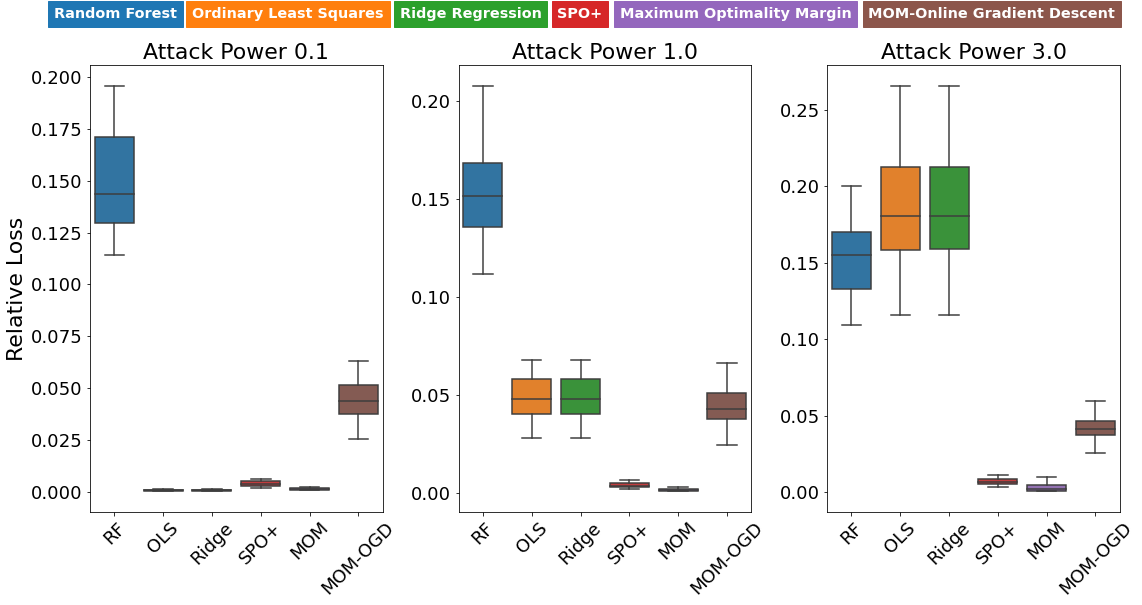

In [38]:
# Second Experiment
# Loss versus Attack Power
ap_set = [0.1, 1.0, 3.0]
fig, axs = plt.subplots(1, 3)
fig.set_figwidth(16)
fig.set_figheight(8)
#Algs = ["RF", "OLS", "Ridge", "MOM", "SPO+", "MOM-OGD"]
#Loss = []
#columns = []

for i in range(len(ap_set)):
    globals()[f"Data_power_{ap_set[i]}"] = np.loadtxt(os.path.join('Attack_Power', f"Loss_power_{ap_set[i]}"))
    columns = ["RF", "OLS", "Ridge", "MOM", "SPO+", "MOM-OGD"]
    globals()[f"Data_power_{ap_set[i]}"] = pd.DataFrame(globals()[f"Data_power_{ap_set[i]}"], columns = columns)
    columns = ["RF", "OLS", "Ridge", "SPO+", "MOM", "MOM-OGD"]
    globals()[f"Data_power_{ap_set[i]}"] = globals()[f"Data_power_{ap_set[i]}"].reindex(columns = columns)
    sns.boxplot(data = globals()[f"Data_power_{ap_set[i]}"], showfliers = False, ax=axs[i])
    axs[i].set_title(f"Attack Power {ap_set[i]}", fontsize=22)
    if i == 0:
        axs[i].set_ylabel('Relative Loss', fontsize=22)
    axs[i].tick_params(axis='x', rotation=45, labelsize=18)
    axs[i].tick_params(axis='y', labelsize=18)

x = 0.05
y = 0.025
fig.text(0.0+x, 1.0+y, 'Random Forest',
         backgroundcolor=sns.color_palette()[0], 
         color='white', weight='extra bold', size='x-large')
fig.text(0.12+x, 1.0+y, 'Ordinary Least Squares',
         backgroundcolor=sns.color_palette()[1],
         color='white', weight='extra bold', size='x-large')
fig.text(0.30+x, 1.0+y, 'Ridge Regression',
         backgroundcolor=sns.color_palette()[2],
         color='white', weight='extra bold', size='x-large')
fig.text(0.437+x, 1.0+y, 'SPO+',
         backgroundcolor=sns.color_palette()[3],
         color='white', weight='extra bold', size='x-large')
fig.text(0.491+x, 1.0+y, 'Maximum Optimality Margin',
         backgroundcolor=sns.color_palette()[4],
         color='white', weight='extra bold', size='x-large')
fig.text(0.707+x, 1.0+y, 'MOM-Online Gradient Descent',
         backgroundcolor=sns.color_palette()[5],
         color='white', weight='extra bold', size='x-large')
plt.tight_layout()
plt.savefig("Experiment2-1.eps", bbox_inches='tight')
plt.savefig("Experiment2-1.jpg", bbox_inches='tight')
plt.show()

#for i in range(len(ap_set)):
#    globals()[f"Data_power_{ap_set[i]}"] = np.loadtxt(os.path.join('Attack_Power', f"Loss_power_{ap_set[i]}"))
#    if i == 0:
#        Loss = globals()[f"Data_power_{ap_set[i]}"]
#    else:
#        Loss = np.concatenate((Loss, globals()[f"Data_power_{ap_set[i]}"]), axis=1)
#    columns = columns + ["RF"+f"{ap_set[i]}", "OLS"+f"{ap_set[i]}", "Ridge"+f"{ap_set[i]}", "MOM"+f"{ap_set[i]}", "SPO+"+f"{ap_set[i]}", "MOM-OGD"+f"{ap_set[i]}"]
#Loss_Data = pd.DataFrame(Loss, columns = columns)
#ax = sns.boxplot(data=Loss_Data, showfliers = False)

#xticks = []
#xticklabels = []
#for i in range(len(ap_set)):
#    xticks.append(int(len(Algs)/2) + i * len(Algs))
#    xticklabels.append(f'Attack power {ap_set[i]}')
#plt.setp(ax, xticks=xticks, xticklabels=xticklabels)
#boxes = ax.artists

#for i,box in enumerate(boxes):
#    for j in range(len(Algs)):
#        if Algs[j] in Loss_Data.columns[i]:
#            box.set_facecolor(sns.color_palette()[j])
# for i,box in enumerate(boxes):
#     box.set_facecolor(sns.color_palette()[i%len(Algs)])


#ax.set_title("Relative Loss Averaged on Test Set, 30 Trials", fontsize = 22, y=1.15)
#ax.set_ylabel('Relative Loss', fontsize=18)
#ax.tick_params(axis='x', labelsize=18)
#ax.tick_params(axis='y', labelsize=18)
#x = 0.15
#y = 0.87
#fig.text(0.05+x, y+0.05, 'Random Forest',
#         backgroundcolor=sns.color_palette()[0], color='white', weight='roman',
#         size='x-large')
#fig.text(0.223+x, y+0.05, 'Ordinary Least Squares',
#         backgroundcolor=sns.color_palette()[1],
#         color='white', weight='roman', size='x-large')
#fig.text(0.48+x, y+0.05, 'Ridge Regression',
#         backgroundcolor=sns.color_palette()[2],
#         color='white', weight='roman', size='x-large')
#fig.text(0.05+x, y, 'Maximum Optimality Margin',
#         backgroundcolor=sns.color_palette()[3],
#         color='white', weight='roman', size='x-large')
#fig.text(0.358+x, y, 'SPO+',
#         backgroundcolor=sns.color_palette()[4],
#         color='white', weight='roman', size='x-large')
#fig.text(0.439+x, y, 'MOM-Online Gradient Descent',
#         backgroundcolor=sns.color_palette()[5],
#         color='white', weight='roman', size='x-large')
#plt.tight_layout()
#plt.savefig("Experiment3-1.eps", bbox_inches='tight')
#plt.savefig("Experiment3-1.jpg", bbox_inches='tight')
#plt.show()

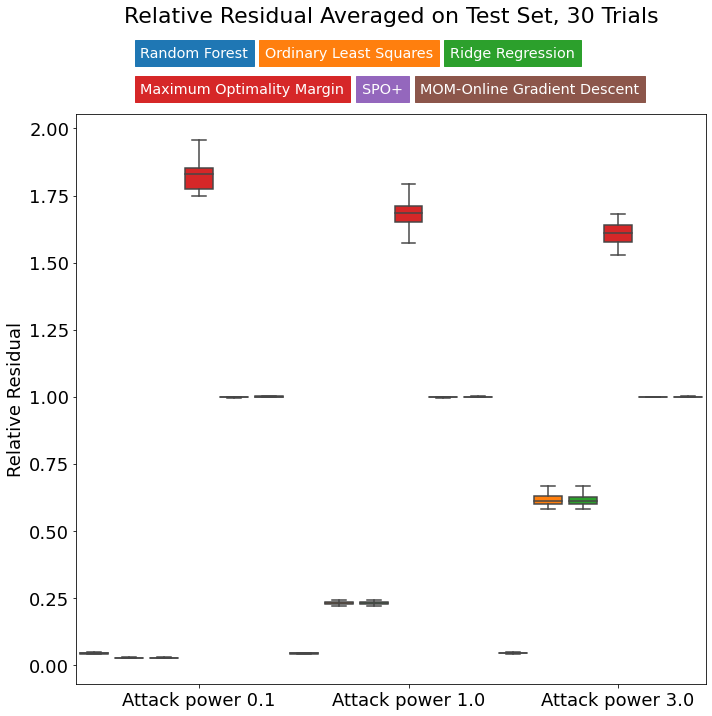

In [21]:
# Third Experiment
# Loss versus Attack Power
ap_set = [0.1, 1.0, 3.0]
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
Algs = ["RF", "OLS", "Ridge", "MOM", "SPO+", "MOM-OGD"]
Loss = []
columns = []
for i in range(len(ap_set)):
    globals()[f"Data_power_{ap_set[i]}"] = np.loadtxt(os.path.join('Attack_Power', f"Error_power_{ap_set[i]}"))
    if i == 0:
        Loss = globals()[f"Data_power_{ap_set[i]}"]
    else:
        Loss = np.concatenate((Loss, globals()[f"Data_power_{ap_set[i]}"]), axis=1)
    columns = columns + ["RF"+f"{ap_set[i]}", "OLS"+f"{ap_set[i]}", "Ridge"+f"{ap_set[i]}", "MOM"+f"{ap_set[i]}", "SPO+"+f"{ap_set[i]}", "MOM-OGD"+f"{ap_set[i]}"]
Loss_Data = pd.DataFrame(Loss, columns = columns)
ax = sns.boxplot(data=Loss_Data, showfliers = False)
# positions = []
# for i in range(len(ap_set)):
#     for j in range(len(Algs)):
#         positions.append((len(Algs)+1)*i+j+1)
# colors = []
# for i in range(len(ap_set)):
#     for j in range(len(Algs)):
#         colors.append(sns.color_palette()[j])
# bp1 = ax.boxplot(x=Loss, showfliers = False, positions = positions, patch_artist=True)

xticks = []
xticklabels = []
for i in range(len(ap_set)):
    xticks.append(int(len(Algs)/2) + i * len(Algs))
    xticklabels.append(f'Attack power {ap_set[i]}')
plt.setp(ax, xticks=xticks, xticklabels=xticklabels)
boxes = ax.artists

for i,box in enumerate(boxes):
    for j in range(len(Algs)):
        if Algs[j] in Loss_Data.columns[i]:
            box.set_facecolor(sns.color_palette()[j])
# for i,box in enumerate(boxes):
#     box.set_facecolor(sns.color_palette()[i%len(Algs)])


ax.set_title("Relative Residual Averaged on Test Set, 30 Trials", fontsize = 22, y=1.15)
ax.set_ylabel('Relative Residual', fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
x = 0.15
y = 0.87
fig.text(0.05+x, y+0.05, 'Random Forest',
         backgroundcolor=sns.color_palette()[0], color='white', weight='roman',
         size='x-large')
fig.text(0.223+x, y+0.05, 'Ordinary Least Squares',
         backgroundcolor=sns.color_palette()[1],
         color='white', weight='roman', size='x-large')
fig.text(0.48+x, y+0.05, 'Ridge Regression',
         backgroundcolor=sns.color_palette()[2],
         color='white', weight='roman', size='x-large')
fig.text(0.05+x, y, 'Maximum Optimality Margin',
         backgroundcolor=sns.color_palette()[3],
         color='white', weight='roman', size='x-large')
fig.text(0.358+x, y, 'SPO+',
         backgroundcolor=sns.color_palette()[4],
         color='white', weight='roman', size='x-large')
fig.text(0.439+x, y, 'MOM-Online Gradient Descent',
         backgroundcolor=sns.color_palette()[5],
         color='white', weight='roman', size='x-large')
plt.tight_layout()
plt.savefig("Experiment3-2.eps", bbox_inches='tight')
plt.savefig("Experiment3-2.jpg", bbox_inches='tight')
plt.show()

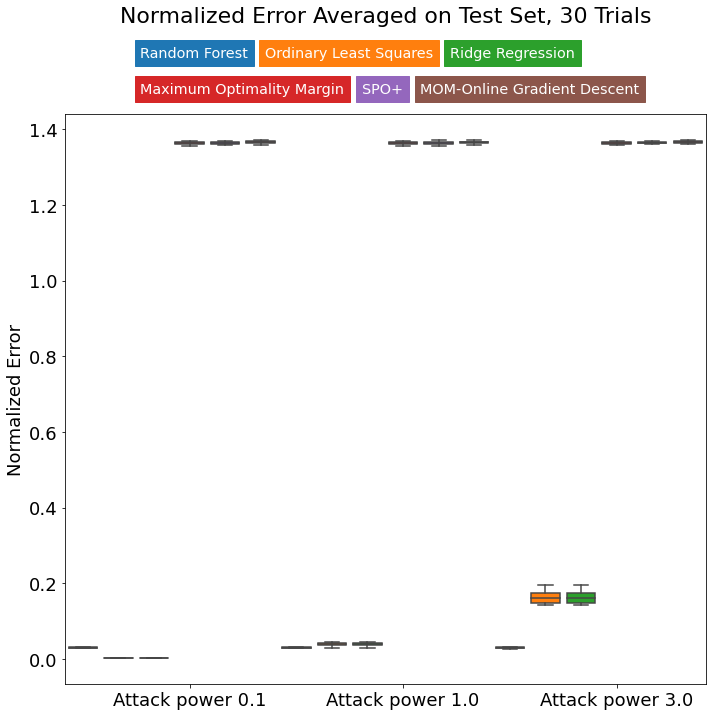

In [22]:
# Third Experiment
# Loss versus Attack Power
ap_set = [0.1, 1.0, 3.0]
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
Algs = ["RF", "OLS", "Ridge", "MOM", "SPO+", "MOM-OGD"]
Loss = []
columns = []
for i in range(len(ap_set)):
    globals()[f"Data_power_{ap_set[i]}"] = np.loadtxt(os.path.join('Attack_Power', f"Norm_Err_power_{ap_set[i]}"))
    if i == 0:
        Loss = globals()[f"Data_power_{ap_set[i]}"]
    else:
        Loss = np.concatenate((Loss, globals()[f"Data_power_{ap_set[i]}"]), axis=1)
    columns = columns + ["RF"+f"{ap_set[i]}", "OLS"+f"{ap_set[i]}", "Ridge"+f"{ap_set[i]}", "MOM"+f"{ap_set[i]}", "SPO+"+f"{ap_set[i]}", "MOM-OGD"+f"{ap_set[i]}"]
Loss_Data = pd.DataFrame(Loss, columns = columns)
ax = sns.boxplot(data=Loss_Data, showfliers = False)
# positions = []
# for i in range(len(ap_set)):
#     for j in range(len(Algs)):
#         positions.append((len(Algs)+1)*i+j+1)
# colors = []
# for i in range(len(ap_set)):
#     for j in range(len(Algs)):
#         colors.append(sns.color_palette()[j])
# bp1 = ax.boxplot(x=Loss, showfliers = False, positions = positions, patch_artist=True)

xticks = []
xticklabels = []
for i in range(len(ap_set)):
    xticks.append(int(len(Algs)/2) + i * len(Algs))
    xticklabels.append(f'Attack power {ap_set[i]}')
plt.setp(ax, xticks=xticks, xticklabels=xticklabels)
boxes = ax.artists

for i,box in enumerate(boxes):
    for j in range(len(Algs)):
        if Algs[j] in Loss_Data.columns[i]:
            box.set_facecolor(sns.color_palette()[j])
# for i,box in enumerate(boxes):
#     box.set_facecolor(sns.color_palette()[i%len(Algs)])


ax.set_title("Normalized Error Averaged on Test Set, 30 Trials", fontsize = 22, y=1.15)
ax.set_ylabel('Normalized Error', fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
x = 0.15
y = 0.87
fig.text(0.05+x, y+0.05, 'Random Forest',
         backgroundcolor=sns.color_palette()[0], color='white', weight='roman',
         size='x-large')
fig.text(0.223+x, y+0.05, 'Ordinary Least Squares',
         backgroundcolor=sns.color_palette()[1],
         color='white', weight='roman', size='x-large')
fig.text(0.48+x, y+0.05, 'Ridge Regression',
         backgroundcolor=sns.color_palette()[2],
         color='white', weight='roman', size='x-large')
fig.text(0.05+x, y, 'Maximum Optimality Margin',
         backgroundcolor=sns.color_palette()[3],
         color='white', weight='roman', size='x-large')
fig.text(0.358+x, y, 'SPO+',
         backgroundcolor=sns.color_palette()[4],
         color='white', weight='roman', size='x-large')
fig.text(0.439+x, y, 'MOM-Online Gradient Descent',
         backgroundcolor=sns.color_palette()[5],
         color='white', weight='roman', size='x-large')
plt.tight_layout()
plt.savefig("Experiment3-3.eps", bbox_inches='tight')
plt.savefig("Experiment3-3.jpg", bbox_inches='tight')
plt.show()

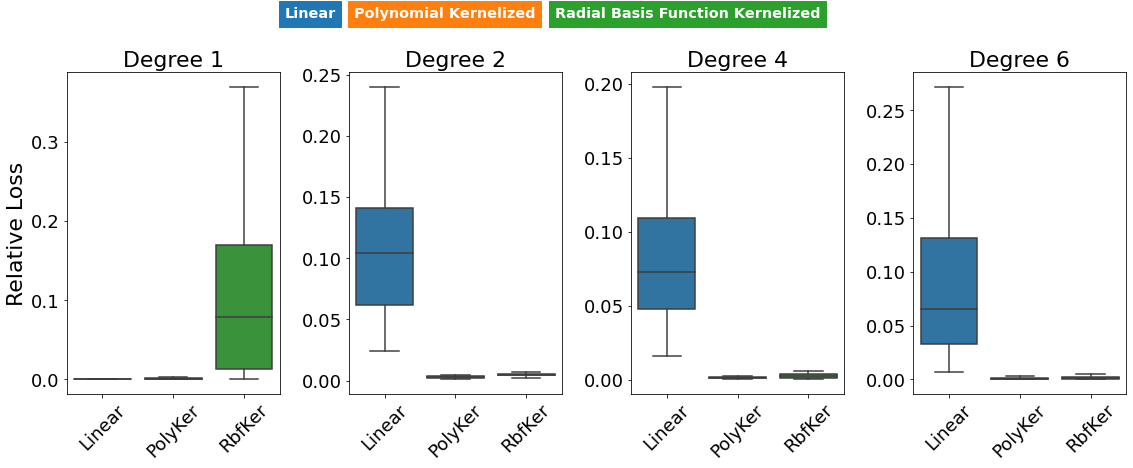

In [55]:
# Fourth Experiment
# Loss versus Degree
degree_set = [1, 2, 4, 6]
fig, axs = plt.subplots(1, 4)
fig.set_figwidth(16)
fig.set_figheight(6)
for i in range(len(degree_set)):
    globals()[f"Data_deg_{degree_set[i]}"] = np.loadtxt(os.path.join('Degree', f"Loss_degree_{degree_set[i]}_Ker"))
    columns = ["Linear", "PolyKer", "RbfKer"]
    globals()[f"Data_deg_{degree_set[i]}"] = pd.DataFrame(globals()[f"Data_deg_{degree_set[i]}"], columns = columns)
    sns.boxplot(data = globals()[f"Data_deg_{degree_set[i]}"], showfliers = False, ax=axs[i])
    axs[i].set_title(f"Degree {degree_set[i]}", fontsize=22)
    if i == 0:
        axs[i].set_ylabel('Relative Loss', fontsize=22)
    axs[i].tick_params(axis='x', rotation=45, labelsize=18)
    axs[i].tick_params(axis='y', labelsize=18)
# for i in range(len(degree_set)):
#     globals()[f"Data_deg_{degree_set[i]}"] = np.loadtxt(os.path.join('Degree', f"Loss_degree_{degree_set[i]}_Ker"))
#     if i == 0:
#         Loss = globals()[f"Data_deg_{degree_set[i]}"]
#     else:
#         Loss = np.concatenate((Loss, globals()[f"Data_deg_{degree_set[i]}"]), axis=1)
#     columns = columns + ["Linear"+f"{degree_set[i]}", "PolyKer"+f"{degree_set[i]}", "Rbf"+f"{degree_set[i]}"]
# Loss_Data = pd.DataFrame(Loss, columns = columns)
# ax = sns.boxplot(data=Loss_Data, showfliers = False)
# positions = []
# for i in range(len(ap_set)):
#     for j in range(len(Algs)):
#         positions.append((len(Algs)+1)*i+j+1)
# colors = []
# for i in range(len(ap_set)):
#     for j in range(len(Algs)):
#         colors.append(sns.color_palette()[j])
# bp1 = ax.boxplot(x=Loss, showfliers = False, positions = positions, patch_artist=True)

# xticks = []
# xticklabels = []
# for i in range(len(degree_set)):
#     xticks.append(int(len(Algs)/2) + i * len(Algs))
#     xticklabels.append(f'Degree {degree_set[i]}')
# plt.setp(ax, xticks=xticks, xticklabels=xticklabels)
# boxes = ax.artists

# for i,box in enumerate(boxes):
#     for j in range(len(Algs)):
#         if Algs[j] in Loss_Data.columns[i]:
#             box.set_facecolor(sns.color_palette()[j])
# for i,box in enumerate(boxes):
#     box.set_facecolor(sns.color_palette()[i%len(Algs)])


x = 0.10
y = 1.00
fig.text(0.16+x, y+0.05, 'Linear',
         backgroundcolor=sns.color_palette()[0], color='white', weight='extra bold',
         size='x-large')
fig.text(0.22+x, y+0.05, 'Polynomial Kernelized',
         backgroundcolor=sns.color_palette()[1],
         color='white', weight='extra bold', size='x-large')
fig.text(0.395+x, y+0.05, 'Radial Basis Function Kernelized',
         backgroundcolor=sns.color_palette()[2],
         color='white', weight='extra bold', size='x-large')
plt.tight_layout()
plt.savefig("Experiment4-1.eps", bbox_inches='tight')
plt.savefig("Experiment4-1.jpg", bbox_inches='tight')
plt.show()

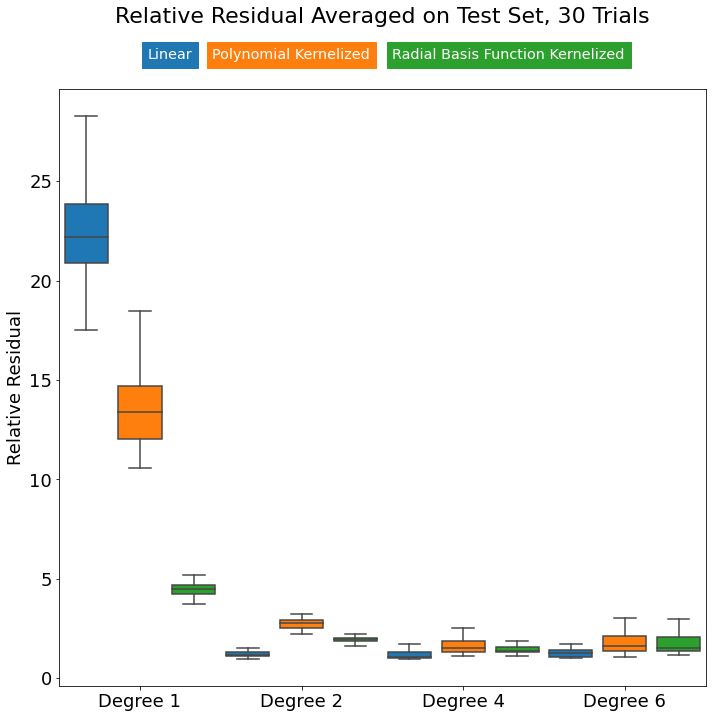

In [98]:
# Third Experiment
# Error versus Degree
degree_set = [1, 2, 4, 6]
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
Algs = ["Linear", "PolyKer", "Rbf"]
Loss = []
columns = []
for i in range(len(degree_set)):
    globals()[f"Data_deg_{degree_set[i]}"] = np.loadtxt(os.path.join('Degree', f"Error_degree_{degree_set[i]}_Ker"))
    if i == 0:
        Loss = globals()[f"Data_deg_{degree_set[i]}"]
    else:
        Loss = np.concatenate((Loss, globals()[f"Data_deg_{degree_set[i]}"]), axis=1)
    columns = columns + ["Linear"+f"{degree_set[i]}", "PolyKer"+f"{degree_set[i]}", "Rbf"+f"{degree_set[i]}"]
Loss_Data = pd.DataFrame(Loss, columns = columns)
ax = sns.boxplot(data=Loss_Data, showfliers = False)
# positions = []
# for i in range(len(ap_set)):
#     for j in range(len(Algs)):
#         positions.append((len(Algs)+1)*i+j+1)
# colors = []
# for i in range(len(ap_set)):
#     for j in range(len(Algs)):
#         colors.append(sns.color_palette()[j])
# bp1 = ax.boxplot(x=Loss, showfliers = False, positions = positions, patch_artist=True)

xticks = []
xticklabels = []
for i in range(len(degree_set)):
    xticks.append(int(len(Algs)/2) + i * len(Algs))
    xticklabels.append(f'Degree {degree_set[i]}')
plt.setp(ax, xticks=xticks, xticklabels=xticklabels)
boxes = ax.artists

for i,box in enumerate(boxes):
    for j in range(len(Algs)):
        if Algs[j] in Loss_Data.columns[i]:
            box.set_facecolor(sns.color_palette()[j])
# for i,box in enumerate(boxes):
#     box.set_facecolor(sns.color_palette()[i%len(Algs)])


ax.set_title("Relative Residual Averaged on Test Set, 30 Trials", fontsize = 22, y=1.10)
ax.set_ylabel('Relative Residual', fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
x = 0.15
y = 0.87
fig.text(0.06+x, y+0.05, 'Linear',
         backgroundcolor=sns.color_palette()[0], color='white', weight='roman',
         size='x-large')
fig.text(0.15+x, y+0.05, 'Polynomial Kernelized',
         backgroundcolor=sns.color_palette()[1],
         color='white', weight='roman', size='x-large')
fig.text(0.40+x, y+0.05, 'Radial Basis Function Kernelized',
         backgroundcolor=sns.color_palette()[2],
         color='white', weight='roman', size='x-large')
plt.tight_layout()
plt.savefig("Experiment5-2.eps", bbox_inches='tight')
plt.savefig("Experiment5-2.jpg", bbox_inches='tight')
plt.show()

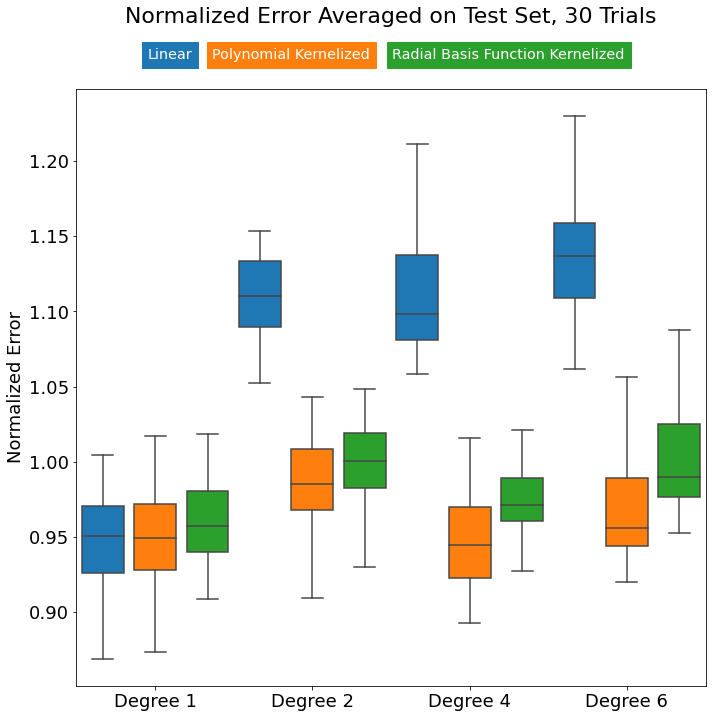

In [99]:
# Third Experiment
# NormErr versus Degree
degree_set = [1, 2, 4, 6]
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
Algs = ["Linear", "PolyKer", "Rbf"]
Loss = []
columns = []
for i in range(len(degree_set)):
    globals()[f"Data_deg_{degree_set[i]}"] = np.loadtxt(os.path.join('Degree', f"Norm_Err_degree_{degree_set[i]}_Ker"))
    if i == 0:
        Loss = globals()[f"Data_deg_{degree_set[i]}"]
    else:
        Loss = np.concatenate((Loss, globals()[f"Data_deg_{degree_set[i]}"]), axis=1)
    columns = columns + ["Linear"+f"{degree_set[i]}", "PolyKer"+f"{degree_set[i]}", "Rbf"+f"{degree_set[i]}"]
Loss_Data = pd.DataFrame(Loss, columns = columns)
ax = sns.boxplot(data=Loss_Data, showfliers = False)
# positions = []
# for i in range(len(ap_set)):
#     for j in range(len(Algs)):
#         positions.append((len(Algs)+1)*i+j+1)
# colors = []
# for i in range(len(ap_set)):
#     for j in range(len(Algs)):
#         colors.append(sns.color_palette()[j])
# bp1 = ax.boxplot(x=Loss, showfliers = False, positions = positions, patch_artist=True)

xticks = []
xticklabels = []
for i in range(len(degree_set)):
    xticks.append(int(len(Algs)/2) + i * len(Algs))
    xticklabels.append(f'Degree {degree_set[i]}')
plt.setp(ax, xticks=xticks, xticklabels=xticklabels)
boxes = ax.artists

for i,box in enumerate(boxes):
    for j in range(len(Algs)):
        if Algs[j] in Loss_Data.columns[i]:
            box.set_facecolor(sns.color_palette()[j])
# for i,box in enumerate(boxes):
#     box.set_facecolor(sns.color_palette()[i%len(Algs)])


ax.set_title("Normalized Error Averaged on Test Set, 30 Trials", fontsize = 22, y=1.10)
ax.set_ylabel('Normalized Error', fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
x = 0.15
y = 0.87
fig.text(0.06+x, y+0.05, 'Linear',
         backgroundcolor=sns.color_palette()[0], color='white', weight='roman',
         size='x-large')
fig.text(0.15+x, y+0.05, 'Polynomial Kernelized',
         backgroundcolor=sns.color_palette()[1],
         color='white', weight='roman', size='x-large')
fig.text(0.40+x, y+0.05, 'Radial Basis Function Kernelized',
         backgroundcolor=sns.color_palette()[2],
         color='white', weight='roman', size='x-large')
plt.tight_layout()
plt.savefig("Experiment5-3.eps", bbox_inches='tight')
plt.savefig("Experiment5-3.jpg", bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


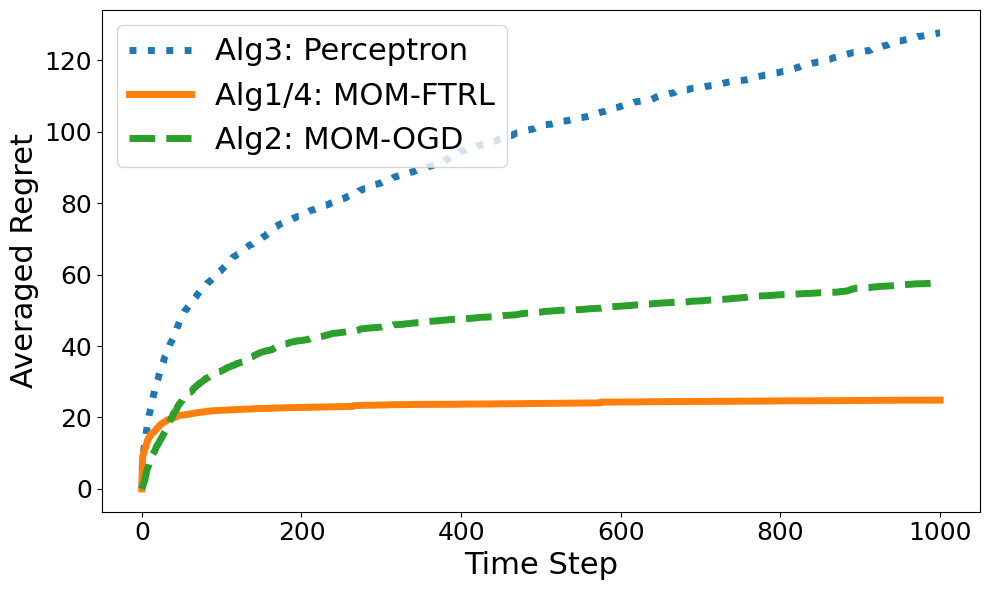

In [2]:
# Fifth Experiment
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(6)
Algs = ["Perceptron", "MOM-FTRL", "MOM-OGD"]
Linestyle = ['dotted', 'solid', 'dashed']
for i in range(len(Algs)):
    globals()[f"Data_{Algs[i]}"] = np.loadtxt(os.path.join('Online', f"{Algs[i]}"))
    ax.plot(globals()[f"Data_{Algs[i]}"], color=sns.color_palette()[i], label=Algs[i], linewidth=5.0, linestyle=Linestyle[i])
ax.legend(['Alg3: Perceptron', 'Alg1/4: MOM-FTRL', 'Alg2: MOM-OGD'], fontsize=22)
ax.set_ylabel('Averaged Regret', fontsize=22)
ax.set_xlabel('Time Step', fontsize=22)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.tight_layout()
plt.savefig("Experiment5-1.eps", bbox_inches='tight')
plt.savefig("Experiment5-1.jpg", bbox_inches='tight')
plt.show()